In [4]:
import numpy as np
import pandas as pd
import pylab as pl
import shapely
from mpl_toolkits.basemap import Basemap
import unicodedata
from unidecode import unidecode
import json
import geopandas as gpd
from get_jsonparsed_data import get_jsonparsed_data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
affs=pd.read_csv("LSST_TVS_subgroups - Sheet1.csv").groupby("affiliation").count()

In [35]:
y = lambda x: unicodedata.normalize('NFKD', unicode(x.split("/")[0], errors="ignore")).replace("Universit ", "Universita ").strip()
#unicode(x.split("/")[0], errors="replace")
#unicode(x.split("/")[0], errors="replace")

affs['aff'] = affs.index.map(y)
affs['aff'].unique()

array([u'AAVSO', u'Adler Planetarium', u'Argonne National Lab',
       u'Arizona State University', u'Armagh Observatory and Planetarium',
       u'Astronomical Observatory Belgrade', u'Caltech',
       u'Carnegie Institution for Science', u'Carnegie Observatories',
       u'Columbia University', u'Cornell University',
       u"Dipartimento di Scienza e di Alte Tecnologie - Universita degli Studi dell'Insubria",
       u'Fisk University', u'Florida Institute of Technology',
       u'Gemini Observatory', u'Harvard',
       u'Harvard Smithsonian Center for Astrophysics',
       u'Heidelberg University', u'Hobart and William Smith Colleges',
       u'IN2P3 CNRS', u'INAF - OATS',
       u'INAF - Osservatorio Astrofisico di Torino',
       u'INAF - Osservatorio Astronomico Roma',
       u'INAF - Osservatorio Astronomico di Bologna',
       u'INAF - Osservatorio Astronomico di Brera',
       u'INAF - Osservatorio Astronomico di Capodimonte',
       u'INAF - Osservatorio Astronomico di Padova

In [49]:
affsloc = {}
for f in affs['aff'].unique(): 
    f2 = f.replace("Lab", "Laboratory").replace("Laboratoryoratory", "Laboratory")
    if f == 'LCOGT':
        f2 = 'University of California Santa Barbara'
    elif "Armagh" in f:
        f2 = "Armagh UK"
    elif "Belgrade" in f:
        f2 = "Belgrade"
    elif "Carnegie" in f:
        f2 = "Pasadena CA"
    elif "IN2P3" in f:
        f2 = 'Paris France'
    elif f  == "NOAO":
        f2 = "Arizona University"
    elif f == 'University of Central Lancashire' or f == 'University of Portsmouth' or f == 'University of Warwick':
        f2 = f.split()[-1] + ' UK'
    elif 'Virgin Islands' in f:
        f2 = 'US Virgin Islands'
    elif 'Tor Vergata' in f:
        f2='Roma IT'
    elif "Universita degli Studi" in f or "Osservatorio Astronomico" in f or "Osservatorio Astrofisico" in f \
    or "University of" in f or "Universita di" in f:
        f2 = f.split()[-1].split("'")[-1]
    elif f == "Gemini Observatory":
        f2 = "La Serena Chile"
    elif "A&M" in f:
        f2 = 'College Station TX'
    elif "Harvard" in f:
        f2 = "Cambridge MA"
    elif "Liverpool" in f:
        f2 = "Liverpool UK"
    elif "Scuola Normale" in f or "Scuola Superiore" in f:
        f2 = "Pisa IT"
    elif "Milano Bicocca" in f:
        f2 = "Milano IT"
    elif "OATS" in f:
        f2 = "Trieste IT"
    elif f == "Universidad Catolica de Chile" or f == "Universidad de Chile" or f in "Universidad Diego Portales":
        f2 = 'Santiago Chile'
    elif "Universidad Catolica del Norte" in f:
        f2 = "Antofagasta"
    elif "Universidad La Serena" in f or 'SOAR' in f:
        f2 = "La Serena"
    elif f == "Hobart and William Smith Colleges":
        f2 = "Geneva, New York"
    elif "SETI Institute" in f:
        f2 = "Mountain View, CA"
    elif "Space Telescope Science Institute" in f:
        f2  = "Baltimore"
    elif "Kavli Institute for Particle Astrophysics and Cosmology" in f or "Linear Accelerator Laboratory" in f or "SLAC" in f:
        f2 = "Stanford CA"
    elif f == 'JPL':
        f2 = 'Pasadena CA'
    elif f == 'LBL':
        f2 = 'Berkeley CA'
    elif 'Max Planck' in f:
        f2 = 'Munchen Germany'
    elif f == "INAF":
        print f, url
        affsloc[f] = ((np.nan, np.nan), np.nan,  np.nan)
        continue
    url = 'http://api.geonames.org/searchJSON?q=%s&maxRows=10&username=freedsbi'%(f2.replace(" ", "%20"))
    try: 
        site = get_jsonparsed_data(url)["geonames"][0]
        #print site["geonameId"]
        if site["geonameId"] == 3914925:
            print "failed - limit reached?"
            break
        affsloc[f] = ((site['lat'], site['lng']), site['countryName'], site['adminCode1'])
    except:
        print f, url
        affsloc[f] = ((np.nan, np.nan), np.nan,  np.nan)

AAVSO http://api.geonames.org/searchJSON?q=AAVSO&maxRows=10&username=freedsbi
Istituto Nazionale di Astrofisica (INAF) http://api.geonames.org/searchJSON?q=Istituto%20Nazionale%20di%20Astrofisica%20(INAF)&maxRows=10&username=freedsbi
LSST http://api.geonames.org/searchJSON?q=LSST&maxRows=10&username=freedsbi
LSSTPO http://api.geonames.org/searchJSON?q=LSSTPO&maxRows=10&username=freedsbi
NASA GSFC http://api.geonames.org/searchJSON?q=NASA%20GSFC&maxRows=10&username=freedsbi
University of California Davis http://api.geonames.org/searchJSON?q=Davis&maxRows=10&username=freedsbi


In [51]:
affsloc


{u'AAVSO': ((nan, nan), nan, nan),
 u'Adler Planetarium': ((u'41.86614', u'-87.60672'), u'United States', u'IL'),
 u'Argonne National Lab': ((u'41.71059', u'-87.98312'),
  u'United States',
  u'IL'),
 u'Arizona State University': ((u'32.23188', u'-110.95347'),
  u'United States',
  u'AZ'),
 u'Armagh Observatory and Planetarium': ((u'54.35', u'-6.66667'),
  u'United Kingdom',
  u'NIR'),
 u'Astronomical Observatory Belgrade': ((u'44.80401', u'20.46513'),
  u'Serbia',
  u'SE'),
 u'Caltech': ((u'36.68882', u'-118.39065'), u'United States', u'CA'),
 u'Carnegie Institution for Science': ((u'34.14778', u'-118.14452'),
  u'United States',
  u'CA'),
 u'Carnegie Observatories': ((u'34.14778', u'-118.14452'),
  u'United States',
  u'CA'),
 u'Columbia University': ((u'40.80899', u'-73.96125'),
  u'United States',
  u'NY'),
 u'Cornell University': ((u'42.44702', u'-76.483'), u'United States', u'NY'),
 u"Dipartimento di Scienza e di Alte Tecnologie - Universita degli Studi dell'Insubria": ((u'45.798

In [52]:
affs['loc'] = affs['aff'].map(affsloc)
affs['loc'][0] = ((np.nan,np.nan),np.nan)
affs['loc'][0], affs['loc'][1], [0][0]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(((nan, nan), nan), ((u'41.86614', u'-87.60672'), u'United States', u'IL'), 0)

In [53]:
affsgeo = gpd.GeoDataFrame(affs)

In [54]:
# combine lat and lon to one column
affs['lonlat'] = zip([float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], [float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))]) 
# Create Point Geometry for based on lonlat column
affs['geometry'] = affs[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
affs.head()



,last name,first name,continent,email,primary,secondary,secondary.1,secondary.2,Unnamed: 9,Unnamed: 10,date added,added by,aff,loc,lonlat,geometry
affiliation,,,,,,,,,,,,,,,,
AAVSO,1,1,0,1,1,1,1,1,0,0,0,0,AAVSO,"((nan, nan), nan)","(nan, nan)",POINT (nan nan)
Adler Planetarium,1,1,0,1,1,1,1,1,0,0,0,0,Adler Planetarium,"((41.86614, -87.60672), United States, IL)","(41.86614, -87.60672)",POINT (41.86614 -87.60672)
Argonne National Lab,1,1,0,1,1,0,0,0,0,0,0,0,Argonne National Lab,"((41.71059, -87.98312), United States, IL)","(41.71059, -87.98312)",POINT (41.71059 -87.98312)
Arizona State University,2,2,0,2,1,1,1,1,0,0,0,0,Arizona State University,"((32.23188, -110.95347), United States, AZ)","(32.23188, -110.95347)",POINT (32.23188 -110.95347)
Armagh Observatory and Planetarium,1,1,1,1,1,1,1,1,0,0,0,0,Armagh Observatory and Planetarium,"((54.35, -6.66667), United Kingdom, NIR)","(54.35, -6.66667)",POINT (54.35 -6.66667)


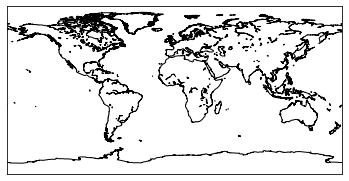

In [55]:

m = Basemap(width=12000000,height=9000000, projection='cyl',
            resolution='l', lat_1=-90, lat_2=90, lat_0=0, lon_0=0.)
m.drawcoastlines()
#m.shadedrelief()
#m.drawcountries()

In [56]:
affs['loc'][:][0][0]


(nan, nan)

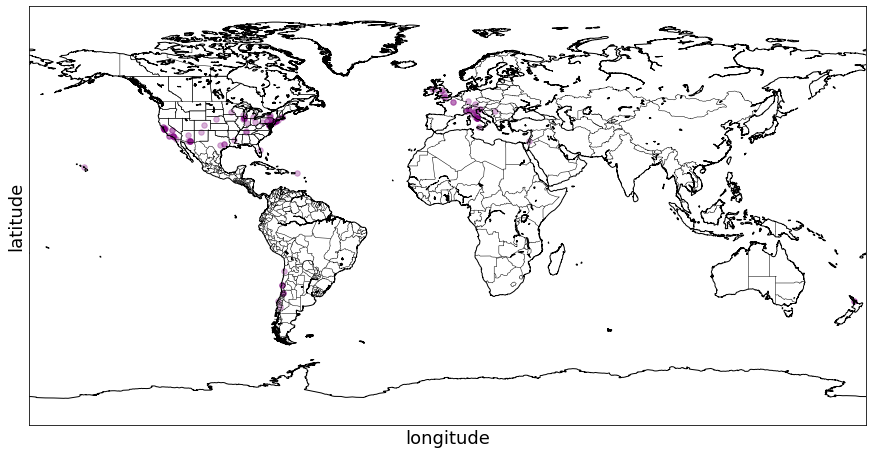

In [90]:
pl.figure(figsize=(15,10))
pl.scatter([float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))],
           [float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], c='purple', alpha=.3, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
m = Basemap(width=12000000,height=9000000, projection='cyl',
            resolution='l', lat_1=-90, lat_2=90, lat_0=0, lon_0=0.)
m.drawcoastlines()
m.drawstates()
m.drawcountries()
pl.savefig("LSST_TVS_World.png")

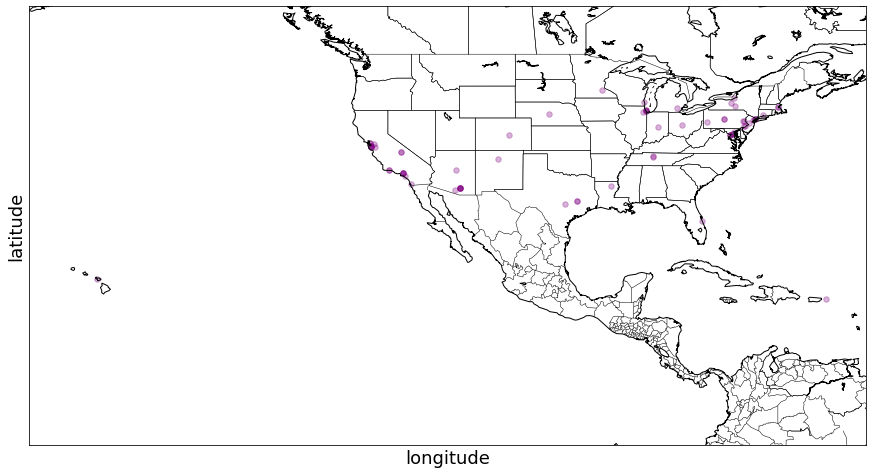

In [95]:
pl.figure(figsize=(15,10))
pl.scatter([float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))],
           [float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], c='purple', alpha=.3, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.ylim(0,90)
pl.xlim(-60,-90)
m = Basemap(width=12000000,height=9000000, projection='cyl',
            resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawstates();
pl.xlim(-165, -60)
pl.ylim(0, 55)
pl.savefig("LSST_TVS_USA.png")

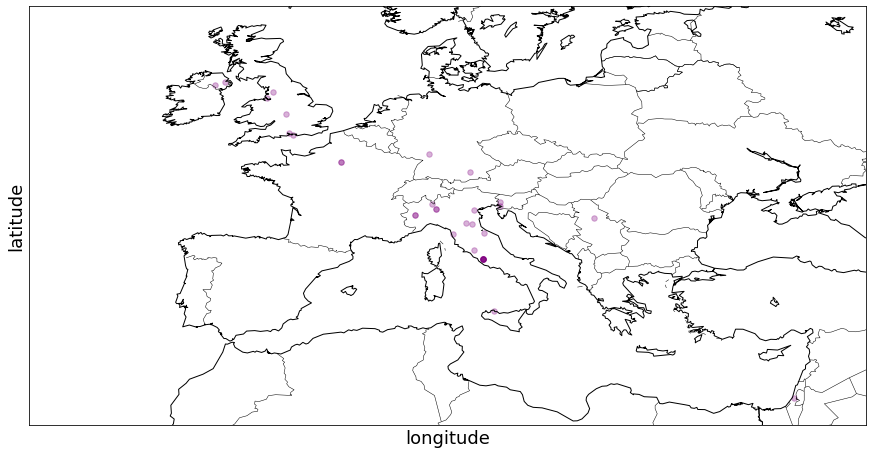

In [96]:
pl.figure(figsize=(15,10))
pl.scatter([float(affs['loc'][i][0][1]) for i in range(len(affs['loc']))],
           [float(affs['loc'][i][0][0]) for i in range(len(affs['loc']))], c='purple', alpha=.3, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)

m = Basemap(width=12000000,height=9000000, projection='cyl',
            resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawstates();
pl.xlim(-20, 40)
pl.ylim(30, 60)
pl.savefig("LSST_TVS_EU.png");